In [3]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [1]:
def display_scores(sc):
    
    
    ft=10
    ft_label=12
    
    bs=sc.size(0)
    nb_class=sc.size(1)
    
    f, ax = plt.subplots(1, bs)

    if bs ==2:
         f.set_size_inches(8, 8)
         f.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.5)
    else:
         f.set_size_inches(12, 12)
         f.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.25)
    
    max_score= sc.max().item()
    min_score=sc.min().item()

    label_pos= min_score-8
    xmin=-5.5
    xmax=5.5

    
    label=[]
    for i in range(nb_class):
        str_nb="{0:.0f}".format(i)
        mystr='class '+ str_nb
        label.append(mystr)
        
    y_pos = np.arange(nb_class)*1.2
               
        
        
    for count in range(bs):
        
        ax[count].set_title('data point '+ "{0:.0f}".format(count))
        
        scores=sc[count].numpy()

        width=0.9
        col='darkgreen'

    #    plt.rcdefaults()
        
        # line in the middle
        ax[count].plot([0,0], [y_pos[0]-1,y_pos[-1]+1], color='k',linewidth=4)


        # the plot
        barlist=ax[count].barh(y_pos, scores, width , align='center', color=col)

        for idx,bar in enumerate(barlist):
            if scores[idx]<0:
                bar.set_color('r')

        ax[count].set_xlim([xmin, xmax])
        ax[count].invert_yaxis()  

        # no y label
        ax[count].set_yticklabels([])
        ax[count].set_yticks([])

        # x label
        ax[count].set_xticklabels([])
        ax[count].set_xticks([])


        ax[count].spines['right'].set_visible(False)
        ax[count].spines['top'].set_visible(False)
        ax[count].spines['bottom'].set_visible(False)
        ax[count].spines['left'].set_visible(False)
        
        ax[count].set_aspect('equal')


        for i in range(len(scores)):

            str_nb="{0:.1f}".format(scores[i])
            if scores[i]>=0:
                ax[count].text( scores[i] + 0.05 , y_pos[i] ,str_nb ,
                     horizontalalignment='left', verticalalignment='center',
                     transform=ax[count].transData, color= col,fontsize=ft)
            else:
                ax[count].text( scores[i] - 0.05 , y_pos[i] ,str_nb ,
                     horizontalalignment='right', verticalalignment='center',
                     transform=ax[count].transData, color= 'r',fontsize=ft)
                
            if  count ==0: 
                ax[0].text( label_pos , y_pos[i] , label[i] ,
                         horizontalalignment='left', verticalalignment='center',
                         transform=ax[0].transData, color= 'black',fontsize=ft_label)

         
    plt.show()

Make a Cross Entropy Criterion and call it criterion. The command is nn.CrossEntropyLoss().

In [4]:
criterion=nn.CrossEntropyLoss()

print(criterion)

CrossEntropyLoss()


Suppose that there only two classes (class 0 and class 1).
Suppose we have a batch of three data points:
x(0) belongs to class 0
x(1)belongs to class 1
x(2) belongs to class 1
Put the labels of each of these point a LongTensor:

In [5]:
labels = torch.LongTensor([0,1,1])

print(labels)

tensor([0, 1, 1])


Make a batch of scores: each row corresponds to the scores associated with a data point. Choose scores that will leads to a loss very close to zero, let say around or smaller than 0.1 (indicating that the scores are very good with respect to the labels).

In [6]:
scores = torch.Tensor( [ [5.2,-1.2], [-1.0,4.0], [-1,2] ] )

print(scores)

tensor([[ 5.2000, -1.2000],
        [-1.0000,  4.0000],
        [-1.0000,  2.0000]])


Display your batch of scores

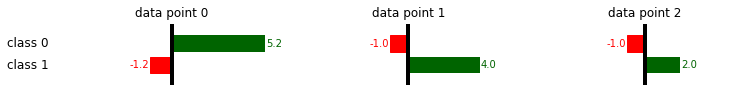

In [7]:
display_scores(scores)

Compute the average loss on this batch -- it needs to be around or smaller than 0.05

In [8]:
average_loss = criterion( scores, labels)

print(average_loss.item())

0.018987612798810005
